In [2]:



#MOVIE DATA ANLYSIS PREDICTION




In [3]:
print("Installing required packages...")
!pip install -q pandas numpy matplotlib seaborn scikit-learn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries installed and imported successfully!")

Installing required packages...
✅ Libraries installed and imported successfully!


(UPLOADING THE DATA SET AND CLEAINING THE DATASET)



In [6]:
data = files.upload()


Saving IMDb Movies India.csv to IMDb Movies India.csv


## Load the dataset

### Subtask:
Load the data into a pandas DataFrame.


In [9]:
df = pd.read_csv('IMDb Movies India.csv', encoding='latin-1')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


HANDLE MISSING VALUES 


In [10]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


In [11]:
df.dropna(subset=['Duration', 'Rating', 'Votes', 'Actor 2', 'Actor 3', 'Genre', 'Actor 1', 'Year', 'Director'], inplace=True)
print("\nMissing values after dropping rows:")
print(df.isnull().sum())


Missing values after dropping rows:
Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64


## Remove duplicates

### Subtask:
Identify and remove duplicate rows.

**Reasoning**:
Remove duplicate rows from the DataFrame to ensure the uniqueness of each record and display the shape of the DataFrame before and after removing duplicates.

In [20]:


print(f"Shape of the DataFrame after removing duplicates: {df.shape}")
df.drop_duplicates(inplace=True)

Shape of the DataFrame after removing duplicates: (5659, 10)


CLEANING DATA TYPES 


In [21]:
df['Year'] = df['Year'].astype(str).str.extract('(\d+)').astype(int)
df['Duration'] = df['Duration'].astype(str).str.replace(' min', '').astype(int)
df['Votes'] = df['Votes'].astype(str).str.replace(',', '').astype(float).astype(int)
df['Rating'] = df['Rating'].astype(float)
print(df.dtypes)

Name         object
Year          int64
Duration      int64
Genre        object
Rating      float64
Votes         int64
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object


In [27]:
print("desprective statistics of numerical columns:")
df.describe()

desprective statistics of numerical columns:


,Year,Duration,Rating,Votes
count,5659.000000,5659.000000,5659.000000,5659.000000
mean,1996.247570,133.439124,5.898533,2697.649585
std,19.741839,25.319939,1.381165,13651.503584
min,1931.000000,21.000000,1.100000,5.000000
25%,1983.000000,119.000000,5.000000,30.000000
50%,2002.000000,135.000000,6.100000,131.000000
75%,2013.000000,150.000000,6.900000,922.500000
max,2021.000000,321.000000,10.000000,591417.000000


from matplotlib import pyplot as plt
_df_0['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Duration'].plot(kind='hist', bins=20, title='Duration')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Rating'].plot(kind='hist', bins=20, title='Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Votes'].plot(kind='hist', bins=20, title='Votes')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Year', y='Duration', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Duration', y='Rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Rating', y='Votes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Duration']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Duration')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Rating')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Votes']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Votes')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Year'}, axis=1)
              .sort_values('Year', ascending=True))
  xs = counted['Year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_11['Year'].plot(kind='line', figsize=(8, 4), title='Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['Duration'].plot(kind='line', figsize=(8, 4), title='Duration')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Rating'].plot(kind='line', figsize=(8, 4), title='Rating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Votes'].plot(kind='line', figsize=(8, 4), title='Votes')
plt.gca().spines[['top', 'right']].set_visible(False)

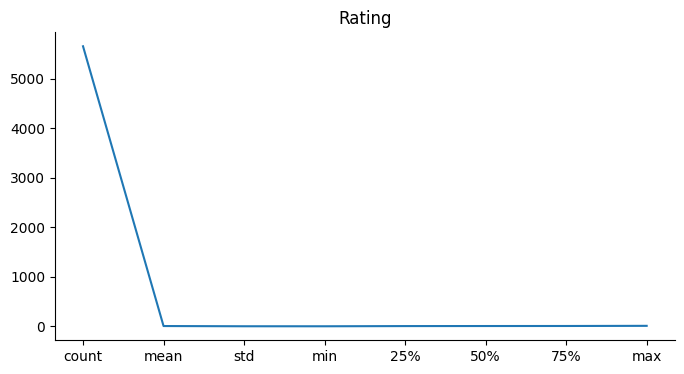

In [30]:
from matplotlib import pyplot as plt
_df_13['Rating'].plot(kind='line', figsize=(8, 4), title='Rating')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
_df_0['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

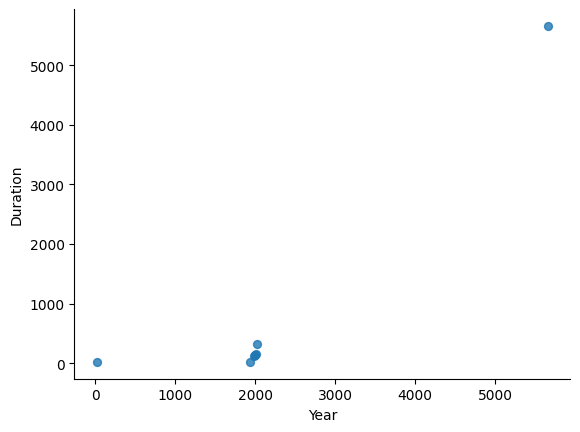

In [28]:
from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Year', y='Duration', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

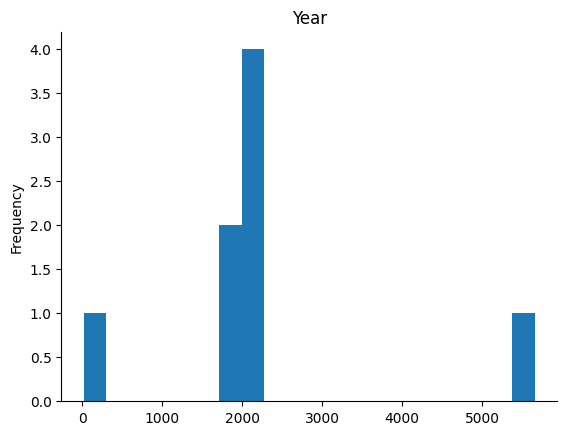

In [29]:
from matplotlib import pyplot as plt
_df_0['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

Top 10 years with the best average ratings:
    Year    Rating
21  1952  7.212500
26  1957  7.080645
13  1944  7.075000
9   1940  7.050000
22  1953  6.955000
15  1946  6.933333
17  1948  6.920000
18  1949  6.915385
24  1955  6.848000
30  1961  6.836000


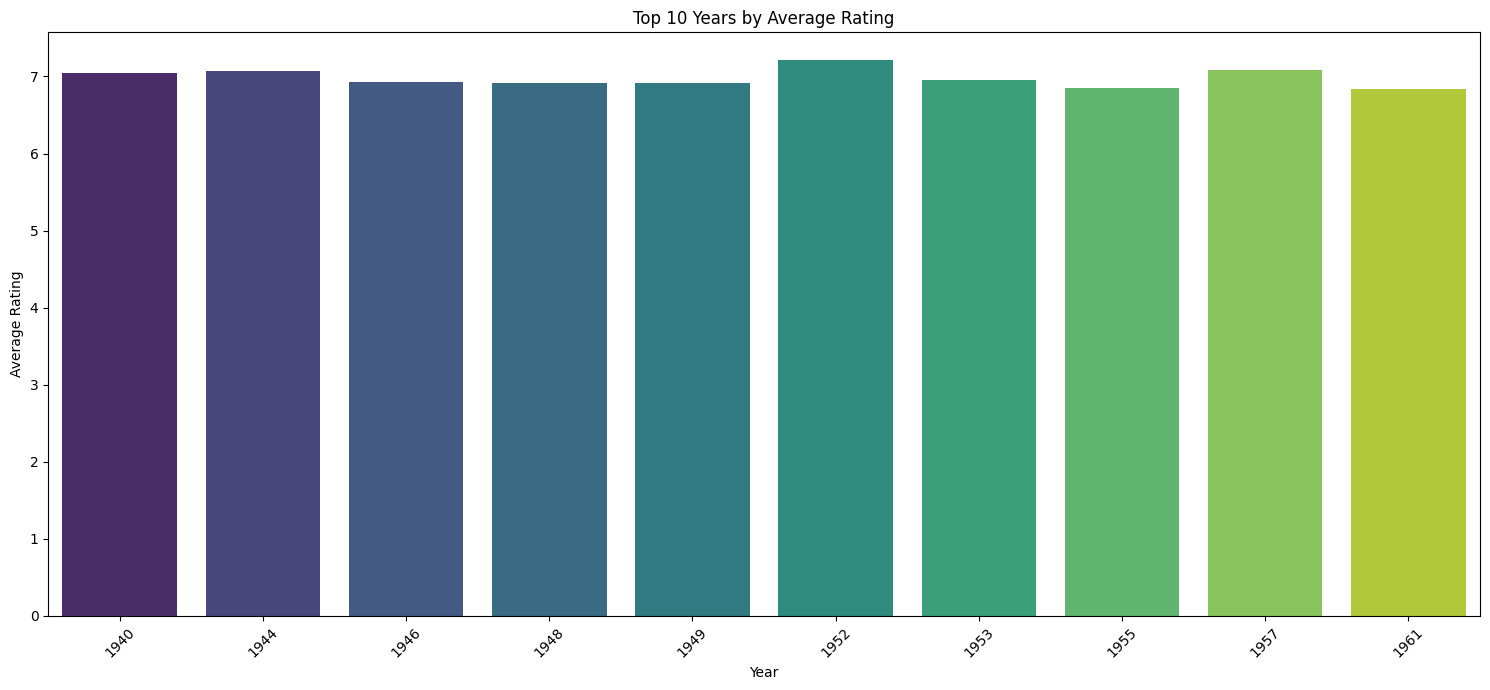

In [34]:
# Which years had the best ratings?
avg_rating_per_year = df.groupby('Year')['Rating'].mean().reset_index()
best_years = avg_rating_per_year.sort_values(by='Rating', ascending=False).head(10)

print("Top 10 years with the best average ratings:")
print(best_years)

plt.figure(figsize=(15, 7))
sns.barplot(x='Year', y='Rating', data=best_years, palette='viridis')
plt.title('Top 10 Years by Average Rating')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Top 10 Actors by Average Rating:
                    Actor  Rating
2255       Mahesh Narayan    10.0
3315  Rajasree Rajakumari    10.0
172             Ahaan Jha    10.0
3286         Raj Banerjee     9.7
3204    Purshottam Mulani     9.7
1281      Emon Chatterjee     9.7
3401         Rakhi Mansha     9.4
2942         Pankaj Kamal     9.4
1794       Jitendra Joshi     9.4
759        Awanish Kotnal     9.4


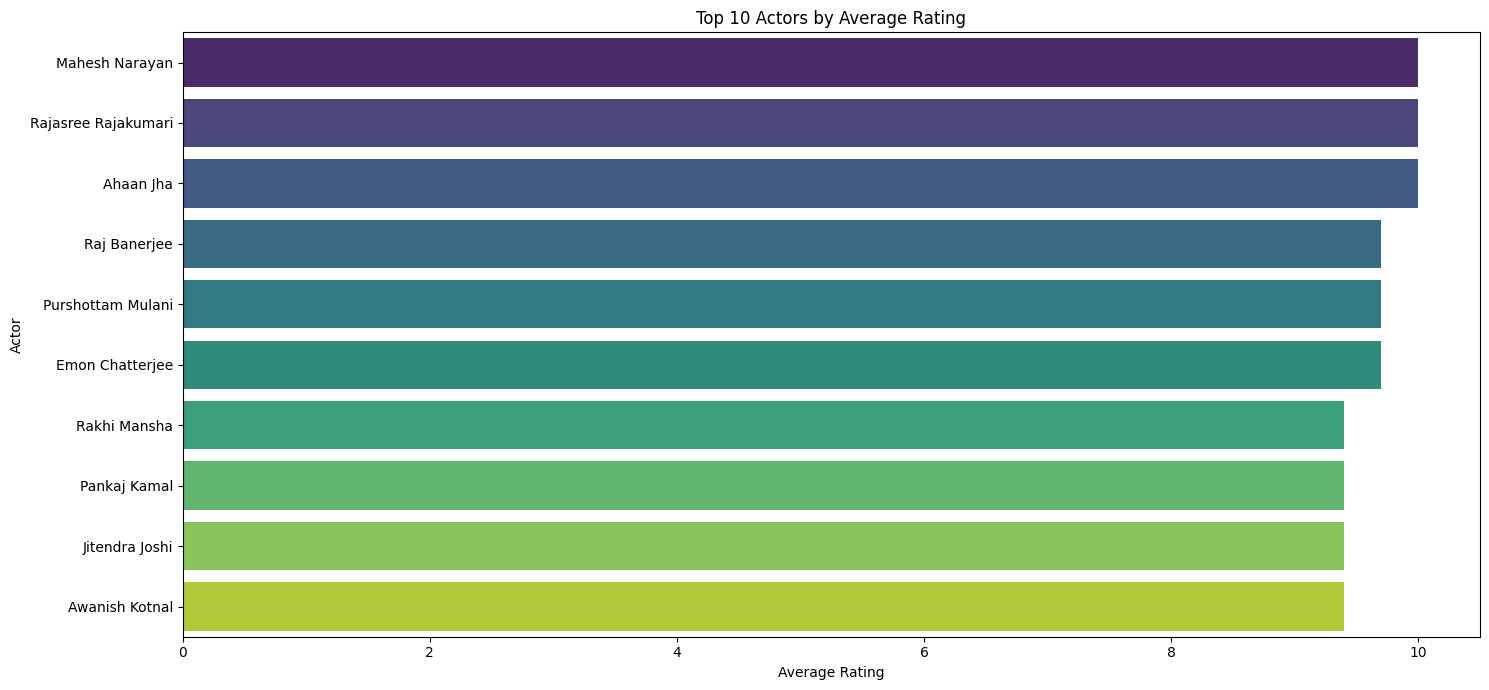

In [46]:
# Which actors give higher-rated movies?
# Identify top actors
best_actors = average_rating_per_actor.sort_values(by='Rating', ascending=False).head(10)

print("Top 10 Actors by Average Rating:")
print(best_actors)

# Visualize top actors
plt.figure(figsize=(15, 7))
sns.barplot(x='Rating', y='Actor', data=best_actors, palette='viridis')
plt.title('Top 10 Actors by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Actor')
plt.tight_layout()
plt.show()

In [ ]:
# FINAL TASK 

### Summary of Findings from EDA:

Based on the exploratory data analysis performed:

*   **Data Cleaning:** We successfully loaded the dataset, handled missing values by dropping rows with missing data in key columns, cleaned the data types of numerical columns ('Year', 'Duration', 'Rating', 'Votes'), and confirmed there were no duplicate rows.
*   **Descriptive Statistics:** The descriptive statistics for numerical columns provided an overview of their distribution and key metrics.
*   **Years with Best Ratings:** We identified the top 10 years with the highest average movie ratings, with 1952 having the highest average rating in this dataset.
*   **Duration and Rating:** While we visualized the relationship between Duration and Rating using a scatter plot, a clear strong linear correlation was not immediately apparent, suggesting that movie duration alone may not be a primary predictor of rating.
*   **Genre Distribution:** We visualized the distribution of movie genres, showing the frequency of different genres in the dataset.
*   **Votes per Year:** The bar chart of total votes per year showed the trend of accumulated votes over time.
*   **Top Directors and Actors by Average Rating:** We identified and visualized the top directors and actors based on the average rating of the movies they were involved in, providing insights into individuals associated with higher-rated films in this dataset.

This EDA has provided valuable insights into the characteristics of the movie dataset, including data distributions, missing values, relationships between some variables, and identification of top-performing years, directors, and actors based on ratings.

**Next Steps (Potential):**

*   Further investigate relationships between other columns (e.g., Genre and Votes, Director and Votes).
*   Explore the distribution of ratings in more detail.
*   Consider sentiment analysis on movie reviews (if available in a more comprehensive dataset).
*   Build a predictive model to predict movie ratings based on the features.